In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
##--------------------------------------------------------------------
                        ## PROJECT 1:
##-----------------------------------------------------------------------
## delete flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
x = []
z = []
IMG_SIZE = 150

FLOWER_DAISY_DIR = "/content/gdrive/MyDrive/archive (4)-20240219T160617Z-001/archive (4)/train/daisy"
FLOWER_SUNFLOWER_DIR ="/content/gdrive/MyDrive/archive (4)-20240219T160617Z-001/archive (4)/train/sunflower"
FLOWER_TULIP_DIR ="/content/gdrive/MyDrive/archive (4)-20240219T160617Z-001/archive (4)/train/tulip"
FLOWER_DANDI_DIR ="/content/gdrive/MyDrive/archive (4)-20240219T160617Z-001/archive (4)/train/dandelion"
FLOWER_ROSE_DIR ="/content/gdrive/MyDrive/archive (4)-20240219T160617Z-001/archive (4)/train/rose"

In [ ]:
def assign_label(img, flower_type):
  return flower_type


In [ ]:
## tqdm ---> it creates a progress bar from loop
def make_train_data(flower_type, DIR):
  for img  in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    x.append(np.array(img))
    z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(x))

100%|██████████| 66/66 [00:00<00:00, 98.55it/s] 

66


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(x))

100%|██████████| 495/495 [00:07<00:00, 70.14it/s]

561


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(x))

100%|██████████| 610/610 [00:10<00:00, 60.83it/s]

1171


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(x))

100%|██████████| 656/656 [00:11<00:00, 57.43it/s]

1827


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(x))

100%|██████████| 497/497 [00:08<00:00, 56.43it/s]

2324


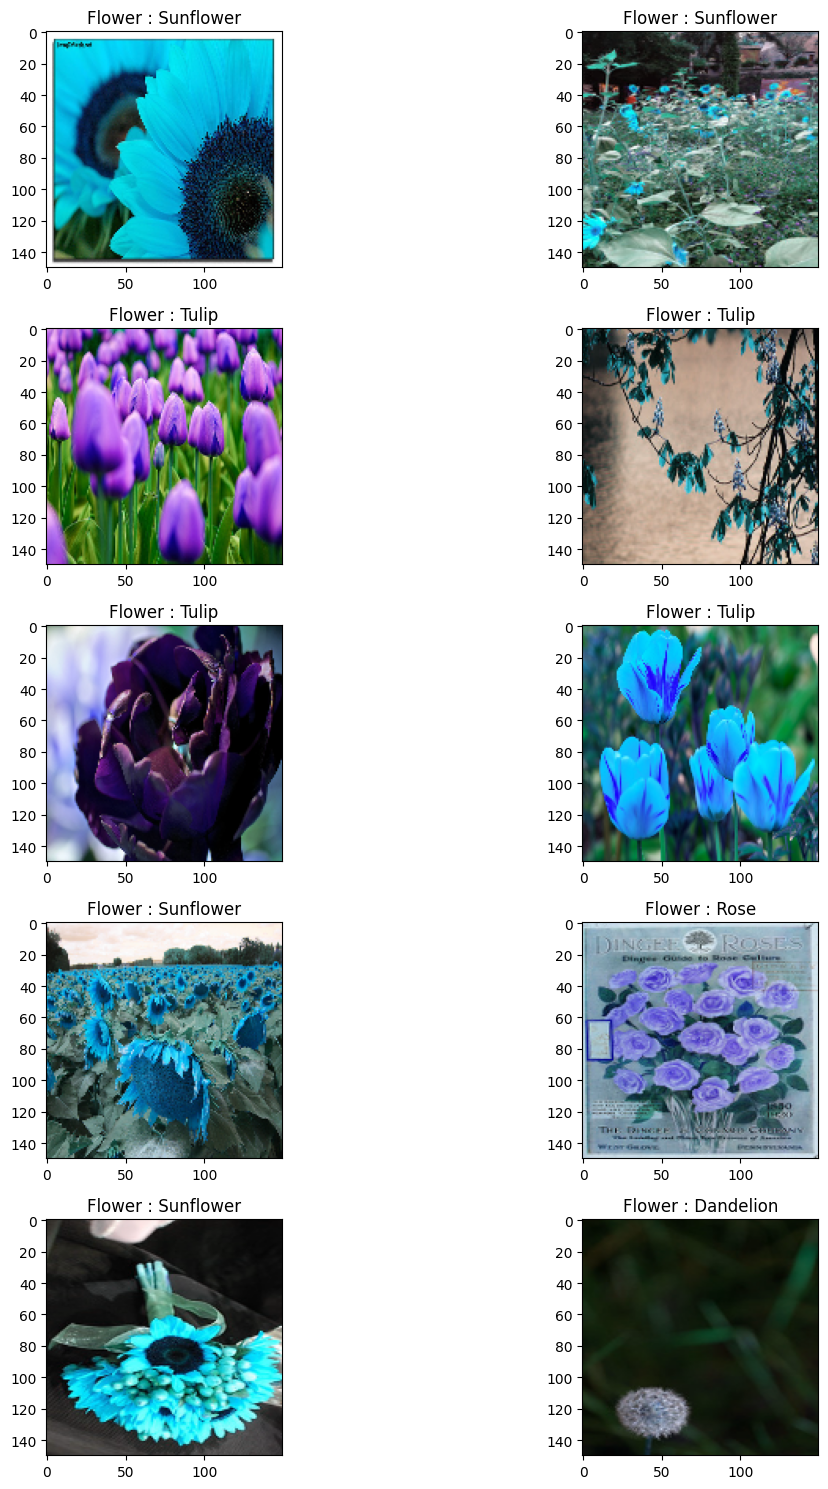

In [ ]:
fig, ax = plt.subplots(5,2)

fig.set_size_inches(15,15)

for row in range(5):
  for col in range(2):
    l = rn.randint(0,len(z))
    ax[row, col].imshow(x[l])
    ax[row, col].set_title("Flower : " +z[l])

  plt.tight_layout()

In [ ]:
# Encoding all the flower names
le=LabelEncoder()
Y=le.fit_transform(z)
Y=to_categorical(Y,5)
X=np.array(x)
X=X/255
# X -->> contains all the image array
# Y -->> contains all the image names
print(X)

[[[[0.05490196 0.05098039 0.03529412]
   [0.05882353 0.04313725 0.03921569]
   [0.04705882 0.03529412 0.03137255]
   ...
   [0.18823529 0.29019608 0.30196078]
   [0.2        0.29803922 0.28235294]
   [0.18039216 0.28627451 0.2745098 ]]

  [[0.04313725 0.03921569 0.01960784]
   [0.05098039 0.03921569 0.02745098]
   [0.04313725 0.03529412 0.02352941]
   ...
   [0.18823529 0.29803922 0.30980392]
   [0.18039216 0.29411765 0.29411765]
   [0.17647059 0.28235294 0.27058824]]

  [[0.04313725 0.04705882 0.01568627]
   [0.05490196 0.04313725 0.02352941]
   [0.04705882 0.04313725 0.02352941]
   ...
   [0.18823529 0.29803922 0.30588235]
   [0.17647059 0.29411765 0.30196078]
   [0.16862745 0.2745098  0.26666667]]

  ...

  [[0.09803922 0.09019608 0.09019608]
   [0.09803922 0.09803922 0.10588235]
   [0.08627451 0.12941176 0.14901961]
   ...
   [0.03137255 0.01176471 0.00392157]
   [0.02745098 0.00784314 0.        ]
   [0.02745098 0.00784314 0.00392157]]

  [[0.10980392 0.12156863 0.13333333]
   [0.1

In [ ]:
##test and train the dataset

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =  0.2,random_state = 42)

In [ ]:
print(z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'S

In [ ]:
##set random seed

np.random.seed(42)
rn.seed(42)

tf.random.set_seed(42)

##building the model
# maxpooling-->2x2
# 2 2
# 5 5
model = Sequential()

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 96,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation = 'softmax'))

In [ ]:
## Adjust the learning rate

batch_size = 128
epoch = 50

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitors = 'val_acc',patience = 3,verbose = 1,factor = 0)

##to prevent the overfitting
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False
)
datagen.fit(x_train)

In [ ]:
# compile keras model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 18, 18, 96)      

In [ ]:
# fitting on training and making predictions

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),
              epochs = epoch, validation_data = (x_test,y_test),
              verbose = 1,steps_per_epoch=x_train.shape[0]//batch_size)

<ipython-input-134-f8f9a94ebad4>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),


Epoch 1/50
14/14 [==============================] - 176s 12s/step - loss: 1.6551 - accuracy: 0.3120 - val_loss: 1.3087 - val_accuracy: 0.3591
Epoch 2/50
14/14 [==============================] - 171s 12s/step - loss: 1.2184 - accuracy: 0.4945 - val_loss: 1.0587 - val_accuracy: 0.5677
Epoch 3/50
14/14 [==============================] - 180s 13s/step - loss: 1.0935 - accuracy: 0.5552 - val_loss: 0.9861 - val_accuracy: 0.6473
Epoch 4/50
14/14 [==============================] - 168s 12s/step - loss: 1.0500 - accuracy: 0.5702 - val_loss: 1.0473 - val_accuracy: 0.6194
Epoch 5/50
14/14 [==============================] - 184s 13s/step - loss: 1.0010 - accuracy: 0.6008 - val_loss: 0.9050 - val_accuracy: 0.6430
Epoch 6/50
14/14 [==============================] - 168s 12s/step - loss: 0.9415 - accuracy: 0.6176 - val_loss: 0.9077 - val_accuracy: 0.6387
Epoch 7/50
14/14 [==============================] - 165s 12s/step - loss: 0.9164 - accuracy: 0.6366 - val_loss: 0.9899 - val_accuracy: 0.6086
Epoch 